In [106]:
# Based loosely on:
# https://www.askpython.com/python-modules/gensim-word2vec
# By Yogesh Sharma / June 17, 2021
# Accessed August 27th 2023
#
# See doc at:
# https://radimrehurek.com/gensim/models/keyedvectors.html

In [107]:
# conda install -c conda-forge gensim

In [108]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np
import gensim
import gensim.downloader

In [109]:
tw_emb = "glove-twitter-25" #105mb
wi50_emb = "glove-wiki-gigaword-50" #66mb
wi300_emb = "glove-wiki-gigaword-300" #376mb

In [110]:
embs = gensim.downloader.load(wi300_emb)

In [111]:
dir(embs)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [119]:
embs.similarity("dog", "cat")

0.68167466

In [116]:
embs.similarity("oslo", "stockholm")

0.6006609

In [117]:
embs.similarity("bicycle", "moped")

0.41230464

In [118]:
embs.similarity("bicycle", "cake")

-0.025343984

In [120]:
embs.most_similar("opel")

[('vauxhall', 0.6387993693351746),
 ('daimlerchrysler', 0.5732048749923706),
 ('vw', 0.5702887177467346),
 ('chrysler', 0.5691757798194885),
 ('automaker', 0.565222442150116),
 ('gm', 0.5620226263999939),
 ('volkswagen', 0.5616093277931213),
 ('carmaker', 0.5614608526229858),
 ('fiat', 0.5512166023254395),
 ('saab', 0.5371128916740417)]

In [121]:
embs.get_vector("opel")

array([ 2.1579e-01,  6.6852e-01, -8.0420e-02,  1.8108e-01, -4.4197e-01,
       -2.4902e-01, -1.8386e-01,  9.8850e-02, -2.6528e-01, -1.3139e+00,
        5.7798e-01,  4.7818e-01, -4.3253e-01,  8.9351e-02,  1.7348e-01,
       -3.2984e-04, -1.2413e-01,  2.9846e-01,  4.5563e-02, -7.9508e-01,
        1.0203e+00,  2.9650e-01,  7.9725e-01, -4.9302e-01,  7.9356e-01,
       -4.9700e-01, -8.6235e-02,  6.5467e-01, -1.2206e-01,  4.3290e-01,
       -3.5990e-01, -4.5599e-01,  3.2817e-01,  4.7819e-01, -5.3992e-03,
        2.7541e-01,  4.5943e-01,  2.7115e-01,  3.2466e-01, -6.5497e-02,
       -2.4207e-01, -1.3828e-01, -2.0602e-01,  3.8766e-01,  7.7135e-02,
       -2.7122e-01,  3.9359e-01,  3.0966e-01, -3.9319e-01, -5.6454e-01,
       -2.6507e-01, -4.0454e-01,  5.7565e-01, -5.3755e-01, -3.9321e-01,
        1.2268e-01,  2.5601e-01,  8.0117e-01, -5.6924e-03,  4.8002e-01,
       -4.9247e-01, -3.4678e-01, -6.2382e-01, -3.7092e-01, -2.1616e-02,
        2.4126e-01, -3.6738e-01,  1.8786e-01,  2.1870e-01, -2.87

In [122]:
words = ["person", "woman", "man" ,"camera","tv"]
vecs = []
for w in words:
    vec = embs.get_vector(w).reshape((1,-1))
    vecs.append(vec)
vecs

[array([[-5.5598e-01,  2.7967e-02, -3.2289e-01, -7.5042e-02, -1.3179e-01,
          1.3271e-01, -1.5578e-01,  1.1468e-01, -5.5989e-02, -1.6266e+00,
          1.2912e-01, -2.0525e-01, -2.1620e-01, -8.7432e-02, -8.5335e-02,
          3.3107e-02, -2.2467e-01, -9.9248e-02, -2.1777e-01, -2.5671e-01,
          6.3234e-02,  5.0175e-01, -1.6002e-01,  3.0961e-01,  2.0912e-01,
         -2.9045e-01,  4.2019e-02, -2.2472e-02,  2.4542e-01, -7.5772e-02,
         -5.6552e-01,  6.2501e-01, -3.5209e-01, -6.0992e-01, -9.3654e-01,
          2.5625e-01,  2.1782e-01, -2.4591e-01, -5.3093e-01,  2.0034e-01,
          2.2471e-02,  7.3258e-02, -2.9808e-02,  8.2042e-02, -2.6838e-01,
          1.1861e-02,  5.9190e-01,  8.2740e-03, -7.7560e-02,  3.7252e-01,
          1.2574e-01,  5.6610e-02,  6.1548e-01,  1.9826e-01, -5.3163e-02,
          2.7715e-01,  1.5825e-01,  1.3941e-01,  3.5109e-01, -2.1844e-01,
          1.0418e-01,  8.9417e-02,  1.1362e-01,  2.5903e-01, -1.0444e-01,
         -3.0457e-01, -3.6033e-01, -2.

In [123]:
matrix = np.vstack(vecs)
matrix

array([[-0.55598 ,  0.027967, -0.32289 , ...,  0.17415 , -0.12442 ,
         0.1537  ],
       [-0.51821 , -0.13809 , -0.41185 , ...,  0.37342 , -0.030166,
         0.73014 ],
       [-0.29784 , -0.13255 , -0.14505 , ...,  0.27613 , -0.2832  ,
         0.50554 ],
       [-0.6574  ,  0.49715 ,  0.097928, ...,  0.80893 ,  0.11281 ,
        -0.2053  ],
       [ 0.069958,  0.53197 ,  0.20131 , ...,  0.49817 , -0.011646,
         0.12519 ]], dtype=float32)

In [124]:
matrix.shape

(5, 300)

In [125]:
m = PCA(n_components=2)

In [126]:
p = m.fit(matrix)
p

PCA(n_components=2)

In [127]:
result = p.transform(matrix)
result

array([[-2.3844767 ,  0.5798964 ],
       [-2.851709  , -0.57266986],
       [-2.3847003 , -0.20741886],
       [ 3.603987  ,  3.7516887 ],
       [ 4.0169    , -3.5514965 ]], dtype=float32)

In [128]:
p.components_

array([[ 0.02931419,  0.09401371,  0.07098387,  0.00446681, -0.0252898 ,
         0.01456488, -0.06198499,  0.0043426 ,  0.01291878,  0.01533458,
         0.01566915,  0.05042075,  0.11871742,  0.01202219,  0.08531718,
         0.02802648, -0.0367875 , -0.0465644 ,  0.09865017, -0.03249215,
         0.05233258, -0.06290007,  0.04498591,  0.01792704,  0.08340199,
        -0.00985363, -0.03981302, -0.02143311,  0.062031  , -0.00741136,
         0.0046734 , -0.13575037,  0.01205405,  0.12788382, -0.04345402,
        -0.04764146, -0.02748941, -0.00649111,  0.03692864,  0.02373804,
        -0.03037818,  0.03847743,  0.0080678 ,  0.06610232, -0.02968235,
        -0.02258064, -0.02406869, -0.02742187,  0.07400389, -0.05438048,
        -0.01698887,  0.02330649, -0.06212141, -0.08247393,  0.0477948 ,
         0.03554279, -0.0129882 , -0.02071235, -0.05370959,  0.03010851,
        -0.06005269, -0.01657563, -0.02664148,  0.03253255,  0.1023828 ,
         0.16977786,  0.10157649,  0.04402808,  0.0

In [129]:
p.explained_variance_ratio_

array([0.4828608 , 0.27202374], dtype=float32)

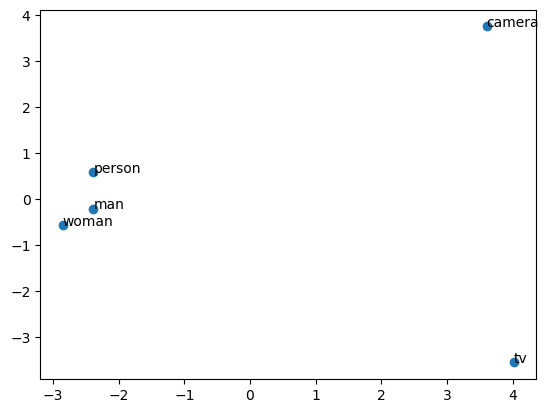

In [130]:
# Plotting adapted from:
# https://www.askpython.com/python-modules/gensim-word2vec
# By Yogesh Sharma / June 17, 2021
# Accessed August 27th 2023

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Oppgaver
- Lag en gjenbrukbar funksjon som lager plottet over for en liste med ord 
- Finn hovedstaden i Tyskland ved å finne ordet som er mest lik vektoren oslo-norge+tyskland
  Hint: bruk embs.most_similar((v1-v2)+v3)
- Skriv en naiv funksjon som søker blant en liste ord og finner ordet som ligner mest av input-ordene. 
  Hvor mange multiplikasjoner må vi gjøre for å gjennomføre dette søket?